In [2]:
from torchmetrics.functional import (
    structural_similarity_index_measure,
    peak_signal_noise_ratio
)
from torchmetrics.image.lpip import LearnedPerceptualImagePatchSimilarity
from PIL import Image, ImageEnhance, ImageOps
# from wand.image import Image as WandImage
from torchvision import transforms
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pandas as pd

sns.set_style("whitegrid")

2023-02-12 12:29:59.451367: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-12 12:30:00.410408: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64:/usr/local/cuda/lib64
2023-02-12 12:30:00.410672: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64:/usr/local/cuda/lib64
2023-02-12 12:30:00.410691: W t

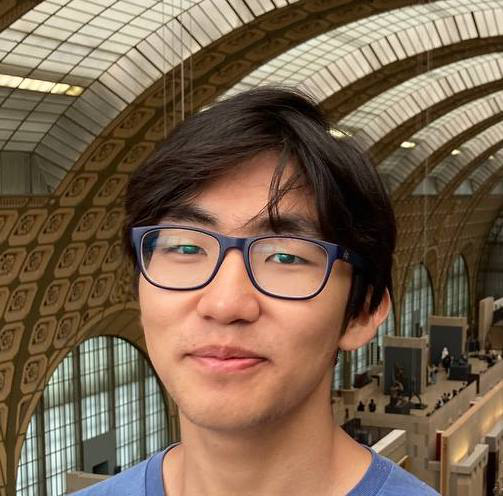

In [3]:
image = Image.open("/data/buvashelhonov/diploma/test_images/я_лицо.png")
image

In [4]:
to_tensor = transforms.ToTensor()
to_tensor_int = transforms.PILToTensor()

In [5]:
lpips = LearnedPerceptualImagePatchSimilarity(normalize=True)

/home/buvashelhonov/miniconda3/envs/nlp/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/buvashelhonov/miniconda3/envs/nlp/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
lpips(to_tensor(image).unsqueeze(0), to_tensor(image).unsqueeze(0)).item()

0.0

# Gaussian Blur

In [157]:
blur_grid = np.linspace(0.01, 10.0, 50)
blur_result = []


for alpha in tqdm(blur_grid):
    contrasted = transforms.GaussianBlur(9, alpha)(image)

    ssim = structural_similarity_index_measure(
        to_tensor(contrasted).unsqueeze(0),
        to_tensor(image).unsqueeze(0)
    ).item()

    psnr = peak_signal_noise_ratio(
        to_tensor_int(contrasted).unsqueeze(0),
        to_tensor_int(image).unsqueeze(0)
    ).item()

    lpips_value = lpips(
        to_tensor(contrasted).unsqueeze(0),
        to_tensor(image).unsqueeze(0)
    ).item()

    blur_result.append({
        "alpha": alpha,
        "value": ssim,
        "metric": "ssim",
    })

    blur_result.append({
        "alpha": alpha,
        "value": psnr,
        "metric": "psnr",
    })

    blur_result.append({
        "alpha": alpha,
        "value": lpips_value,
        "metric": "lpips",
    })

blur_result = pd.DataFrame(blur_result)

100%|██████████| 50/50 [00:04<00:00, 10.51it/s]


<AxesSubplot: xlabel='alpha', ylabel='value'>

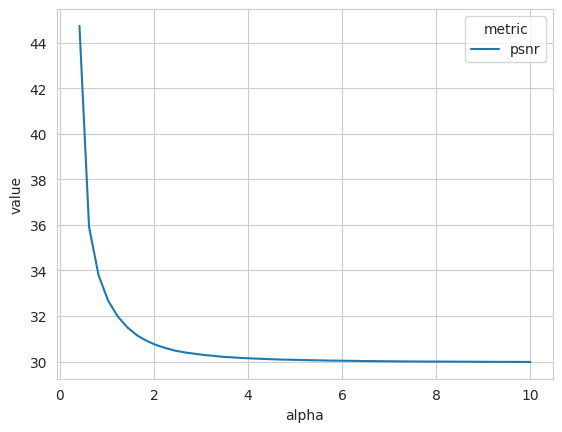

In [158]:
sns.lineplot(data=blur_result, x="alpha", y="value", hue="metric", 
             hue_order=["psnr"])

<AxesSubplot: xlabel='alpha', ylabel='value'>

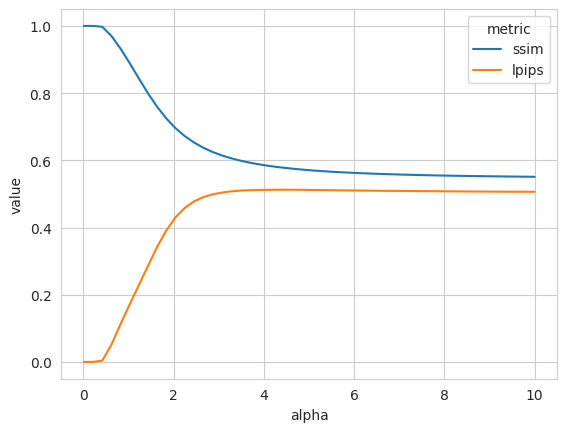

In [160]:
sns.lineplot(data=blur_result, x="alpha", y="value", hue="metric", 
             hue_order=["ssim", "lpips"])

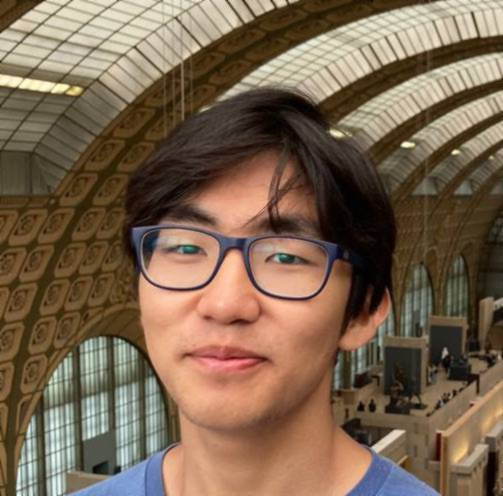

In [150]:
ImageEnhance.Sharpness(image).enhance(0.0)

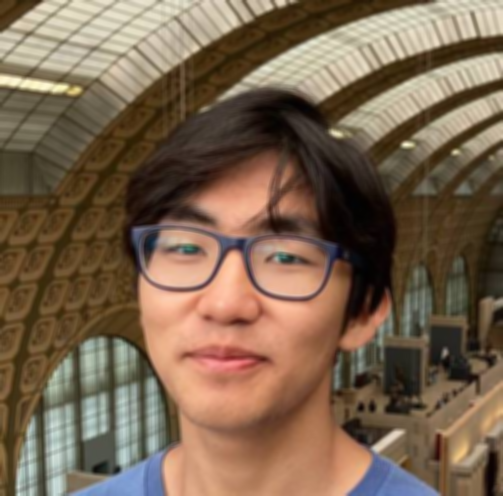

In [7]:
blurred = transforms.GaussianBlur(5, 4.0)(image)
blurred

In [8]:
structural_similarity_index_measure(
    to_tensor(blurred).unsqueeze(0),
    to_tensor(image).unsqueeze(0)
).item()

0.7513271570205688

In [9]:
peak_signal_noise_ratio(
    to_tensor_int(blurred).unsqueeze(0),
    to_tensor_int(image).unsqueeze(0),
).item()

31.239450454711914

In [10]:
lpips(
    to_tensor(blurred).unsqueeze(0),
    to_tensor(image).unsqueeze(0)
).item()

0.30544203519821167

# Contrast

In [133]:
contrast_grid = np.linspace(0.0, 2.0, 50)
contrast_result = []


for alpha in tqdm(contrast_grid):
    contrasted = ImageEnhance.Contrast(image).enhance(alpha)

    ssim = structural_similarity_index_measure(
        to_tensor(contrasted).unsqueeze(0),
        to_tensor(image).unsqueeze(0)
    ).item()

    psnr = peak_signal_noise_ratio(
        to_tensor_int(contrasted).unsqueeze(0),
        to_tensor_int(image).unsqueeze(0)
    ).item()

    lpips_value = lpips(
        to_tensor(contrasted).unsqueeze(0),
        to_tensor(image).unsqueeze(0)
    ).item()

    contrast_result.append({
        "alpha": alpha,
        "value": ssim,
        "metric": "ssim",
    })

    contrast_result.append({
        "alpha": alpha,
        "value": psnr,
        "metric": "psnr",
    })

    contrast_result.append({
        "alpha": alpha,
        "value": lpips_value,
        "metric": "lpips",
    })

contrast_result = pd.DataFrame(contrast_result)

100%|██████████| 50/50 [00:04<00:00, 11.16it/s]


<AxesSubplot: xlabel='alpha', ylabel='value'>

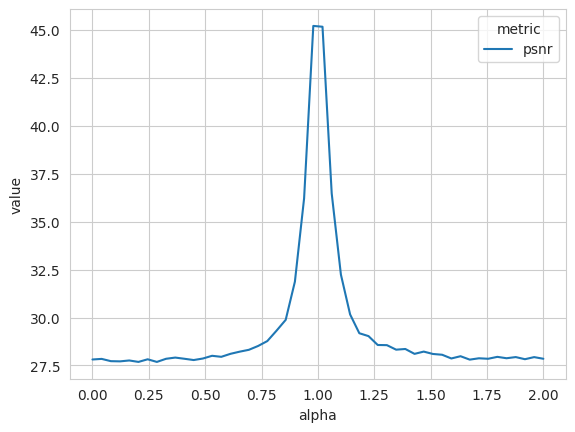

In [139]:
sns.lineplot(data=contrast_result, x="alpha", y="value", hue="metric", 
             hue_order=["psnr"])

<AxesSubplot: xlabel='alpha', ylabel='value'>

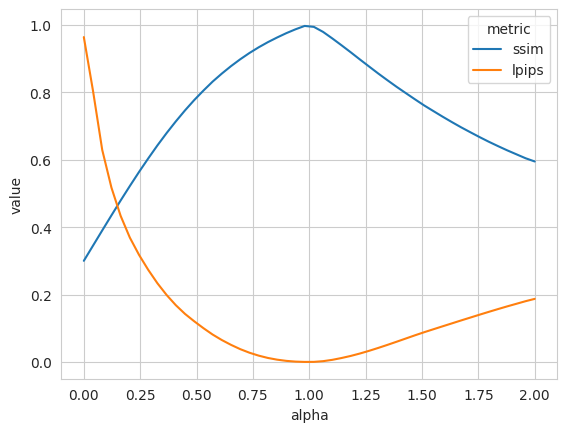

In [138]:
sns.lineplot(data=contrast_result, x="alpha", y="value", hue="metric", 
             hue_order=["ssim", "lpips"])

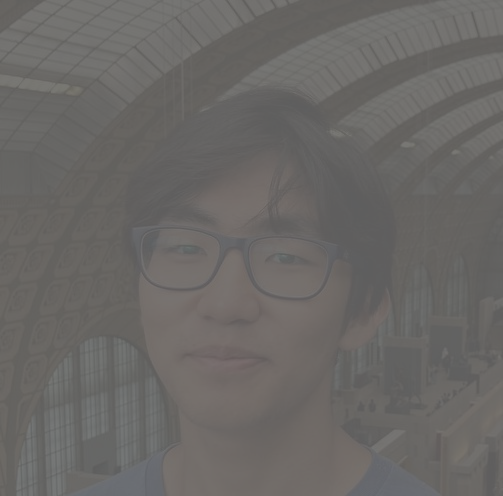

In [11]:
contrasted = ImageEnhance.Contrast(image).enhance(0.1)
contrasted

In [12]:
structural_similarity_index_measure(
    to_tensor(contrasted).unsqueeze(0),
    to_tensor(image).unsqueeze(0)
).item()

0.4106442928314209

In [13]:
peak_signal_noise_ratio(
    to_tensor_int(contrasted).unsqueeze(0),
    to_tensor_int(image).unsqueeze(0)
).item()

27.727739334106445

In [14]:
lpips(
    to_tensor(contrasted).unsqueeze(0),
    to_tensor(image).unsqueeze(0)
).item()

0.5743165016174316

# Деформация

In [15]:
class WaveDeformer:

    def __init__(self, a=1, b=20):
        self.a = a
        self.b = b

    def transform(self, x, y):
        y = y + self.a * np.sin(x / self.b)
        return x, y

    def transform_rectangle(self, x0, y0, x1, y1):
        return (*self.transform(x0, y0),
                *self.transform(x0, y1),
                *self.transform(x1, y1),
                *self.transform(x1, y0),
                )

    def getmesh(self, img):
        self.w, self.h = img.size
        gridspace = 20

        target_grid = []
        for x in range(0, self.w, gridspace):
            for y in range(0, self.h, gridspace):
                target_grid.append((x, y, 
                                    x + gridspace, y + gridspace))

        source_grid = [self.transform_rectangle(*rect)
                                 for rect in target_grid]

        return [t for t in zip(target_grid, source_grid)]

In [171]:
deform_grid = np.linspace(0.0, 20.0, 60)
deform_result = []


for alpha in tqdm(deform_grid):
    contrasted = ImageEnhance.Contrast(image).enhance(alpha)

    ssim = structural_similarity_index_measure(
        to_tensor(contrasted).unsqueeze(0),
        to_tensor(image).unsqueeze(0)
    ).item()

    psnr = peak_signal_noise_ratio(
        to_tensor_int(contrasted).unsqueeze(0),
        to_tensor_int(image).unsqueeze(0)
    ).item()

    lpips_value = lpips(
        to_tensor(contrasted).unsqueeze(0),
        to_tensor(image).unsqueeze(0)
    ).item()

    deform_result.append({
        "alpha": alpha,
        "value": ssim,
        "metric": "ssim",
    })

    deform_result.append({
        "alpha": alpha,
        "value": psnr,
        "metric": "psnr",
    })

    deform_result.append({
        "alpha": alpha,
        "value": lpips_value,
        "metric": "lpips",
    })

deform_result = pd.DataFrame(deform_result)

100%|██████████| 60/60 [00:05<00:00, 10.99it/s]


<AxesSubplot: xlabel='alpha', ylabel='value'>

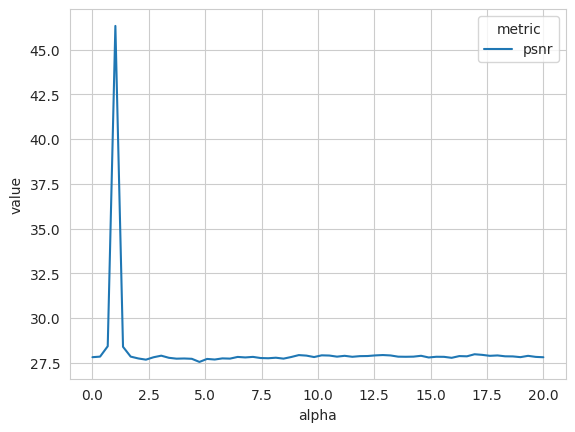

In [174]:
sns.lineplot(data=deform_result, x="alpha", y="value", hue="metric", 
             hue_order=["psnr"])

<AxesSubplot: xlabel='alpha', ylabel='value'>

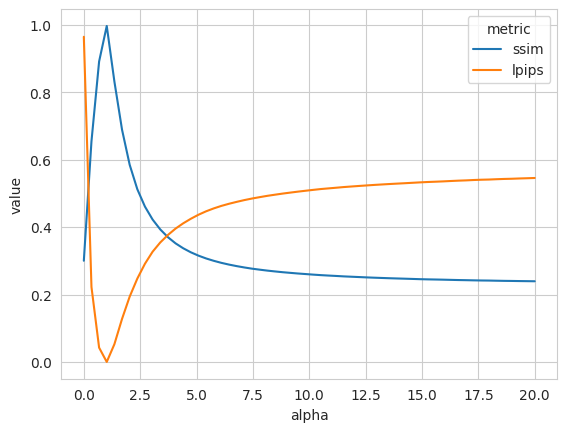

In [172]:
sns.lineplot(data=deform_result, x="alpha", y="value", hue="metric", 
             hue_order=["ssim", "lpips"])

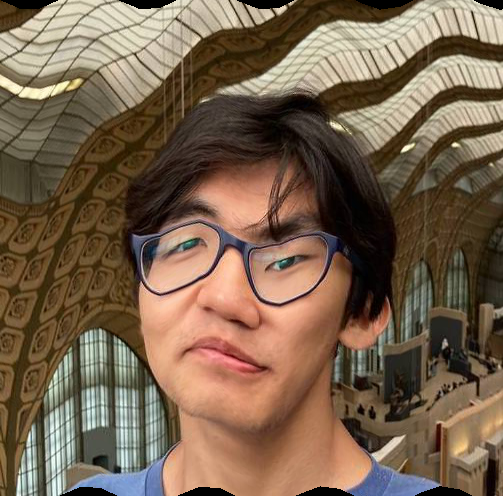

In [20]:
deformed = ImageOps.deform(image, WaveDeformer(10, 0.1))
deformed

In [21]:
structural_similarity_index_measure(
    to_tensor(deformed).unsqueeze(0),
    to_tensor(image).unsqueeze(0)
).item()

0.4088294506072998

In [22]:
peak_signal_noise_ratio(
    to_tensor_int(deformed).unsqueeze(0),
    to_tensor_int(image).unsqueeze(0)
).item()

29.3123779296875

In [23]:
lpips(
    to_tensor(deformed).unsqueeze(0),
    to_tensor(image).unsqueeze(0)
).item()

0.21283242106437683

# Результаты



- LPIPS: Deform, Blur, Contrast + Brightness
- SSIM: Blur, Contrast + Brightness, Deform
- PSNR: Contrast + Brightness, Deform, Blur